# **1. Perkenalan Dataset**


Dataset:
Telco Customer Churn
https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [9]:
RAW_PATH = "../telco_raw.csv" 

df = pd.read_csv(RAW_PATH)
print("Shape:", df.shape)
df.head()


Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isna().sum().sort_values(ascending=False).head(20)


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [12]:
df["Churn"].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

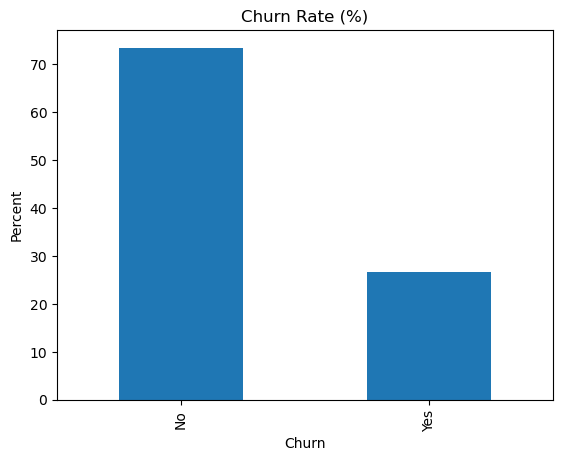

In [13]:
(df["Churn"].value_counts(normalize=True) * 100).plot(kind="bar")
plt.title("Churn Rate (%)")
plt.ylabel("Percent")
plt.show()


In [14]:
if "TotalCharges" in df.columns:
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df[["MonthlyCharges", "TotalCharges"]].describe()


,MonthlyCharges,TotalCharges
count,7043.000000,7032.000000
mean,64.761692,2283.300441
std,30.090047,2266.771362
min,18.250000,18.800000
25%,35.500000,401.450000
50%,70.350000,1397.475000
75%,89.850000,3794.737500
max,118.750000,8684.800000


In [15]:
df.isna().sum().sort_values(ascending=False).head(20)


TotalCharges        11
gender               0
SeniorCitizen        0
Partner              0
customerID           0
Dependents           0
tenure               0
MultipleLines        0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
InternetService      0
TechSupport          0
StreamingTV          0
Contract             0
StreamingMovies      0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
dtype: int64

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

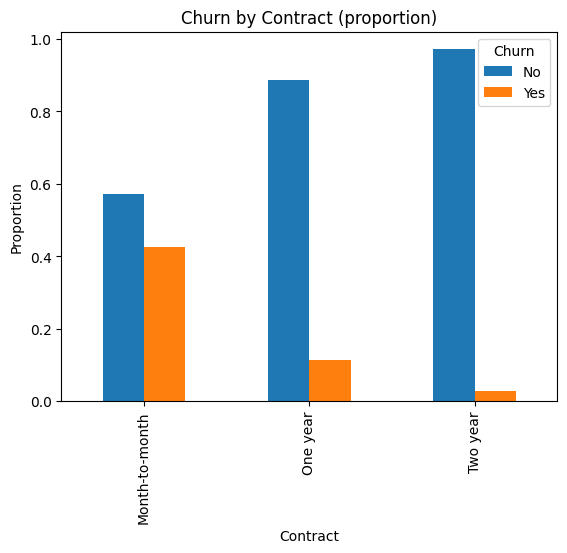

In [ ]:
if "Contract" in df.columns:
    pd.crosstab(df["Contract"], df["Churn"], normalize="index").plot(kind="bar")
    plt.title("Churn by Contract (proportion)")
    plt.ylabel("Proportion")
    plt.show()
else:
    print("Kolom 'Contract' tidak ada di dataset kamu.")


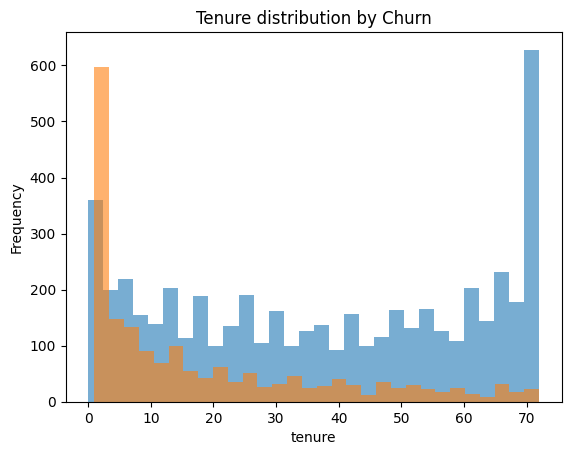

In [ ]:
if "tenure" in df.columns:
    df[df["Churn"]=="No"]["tenure"].plot(kind="hist", bins=30, alpha=0.6)
    df[df["Churn"]=="Yes"]["tenure"].plot(kind="hist", bins=30, alpha=0.6)
    plt.title("Tenure distribution by Churn")
    plt.xlabel("tenure")
    plt.show()
else:
    print("Kolom 'tenure' tidak ada di dataset kamu.")


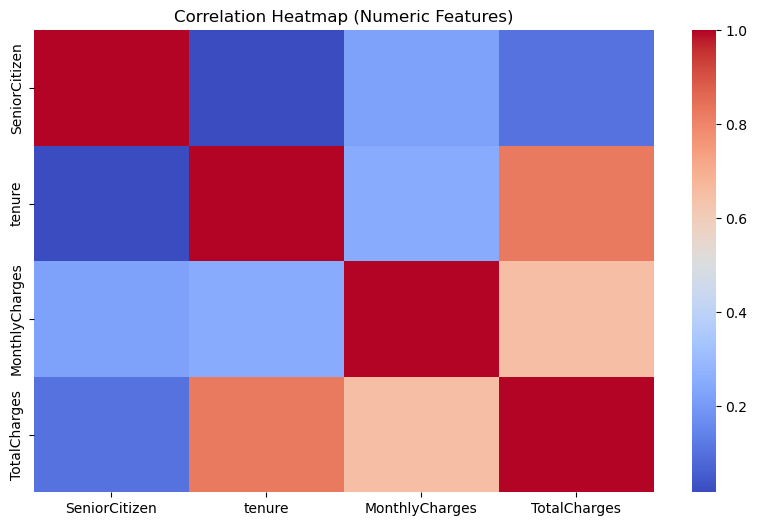

In [18]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(10,6))
sns.heatmap(
    df[numeric_cols].corr(),
    cmap="coolwarm",
    annot=False
)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


### Kesimpulan EDA

Berdasarkan hasil EDA, dapat disimpulkan bahwa:
- Dataset memiliki struktur yang jelas dengan kombinasi fitur numerik dan kategorikal
- Target `Churn` memiliki distribusi yang tidak seimbang
- Tidak ditemukan missing values yang signifikan
- Beberapa fitur numerik memiliki rentang nilai yang berbeda sehingga diperlukan proses normalisasi
- Fitur kategorikal perlu dilakukan encoding sebelum pemodelan

Oleh karena itu, tahap preprocessing diperlukan sebelum membangun model machine learning.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [19]:
df_prep = df.copy()

before = df_prep.shape[0]
df_prep = df_prep.drop_duplicates()
after = df_prep.shape[0]

print(f"Duplikat dihapus: {before - after}")


Duplikat dihapus: 0


In [20]:
df_prep.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
df_prep["TotalCharges"] = pd.to_numeric(
    df_prep["TotalCharges"], errors="coerce"
)

df_prep["TotalCharges"].fillna(
    df_prep["TotalCharges"].median(),
    inplace=True
)


C:\Users\Asus\AppData\Local\Temp\ipykernel_24888\4226777801.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prep["TotalCharges"].fillna(


In [22]:
df_prep["Churn"] = df_prep["Churn"].map({"Yes": 1, "No": 0})


In [23]:
cat_cols = df_prep.select_dtypes(include=["object"]).columns
num_cols = df_prep.select_dtypes(include=["int64", "float64"]).columns

print("Categorical:", cat_cols.tolist())
print("Numerical:", num_cols.tolist())

Categorical: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [24]:
df_encoded = pd.get_dummies(
    df_prep,
    columns=cat_cols,
    drop_first=True
)


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


In [26]:
OUTPUT_PATH = "telco_preprocessed.csv"
df_encoded.to_csv(OUTPUT_PATH, index=False)

print("Dataset preprocessing berhasil disimpan:", OUTPUT_PATH)


Dataset preprocessing berhasil disimpan: telco_preprocessed.csv


### Hasil Preprocessing

Dataset telah melalui seluruh tahapan preprocessing dan siap digunakan untuk pemodelan machine learning.
Dataset hasil preprocessing disimpan dalam file `telco_preprocessed.csv` untuk digunakan pada tahap berikutnya.
